<a href="https://colab.research.google.com/github/arexdevson/Projeto_LIbrary/blob/main/Kmeans_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIBLIOTECAS

In [ ]:
import pandas as pd #leitura e analise de dados
import matplotlib.pyplot as plt #geração de gráficos
from sklearn.preprocessing import LabelEncoder # rotulo para dados categoricos
from sklearn.cluster import KMeans #importando o Kmeans para trabalhar com os centroides e a divisão dos dados em grupos
import plotly.express as px #criação de gráficos dinâmicos
import plotly.graph_objects as go # criação de concatenação dos gráficos
import seaborn as sns #seaborn para gráficos aprimorados

# Importando Dados


In [ ]:
diabetes_dados = pd.read_csv("/content/diabetes.csv",encoding="latin-1",sep=";")

In [ ]:
diabetes_dados = diabetes_dados[["IMC","idade"]]
diabetes_dados

,IMC,idade
0,33.6,50
1,26.6,31
2,23.3,32
3,28.1,21
4,43.1,33
...,...,...
763,32.9,63
764,36.8,27
765,26.2,30
766,30.1,47


# Métricas / ajustes na base

In [ ]:
diabetes_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IMC     768 non-null    float64
 1   idade   768 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 12.1 KB


In [ ]:
diabetes_dados.describe()

,IMC,idade
count,768.000000,768.000000
mean,31.992578,33.240885
std,7.884160,11.760232
min,0.000000,21.000000
25%,27.300000,24.000000
50%,32.000000,29.000000
75%,36.600000,41.000000
max,67.100000,81.000000


In [ ]:

diabetes_dados.isna().sum()

IMC      0
idade    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e3e72f510>]],
      dtype=object)

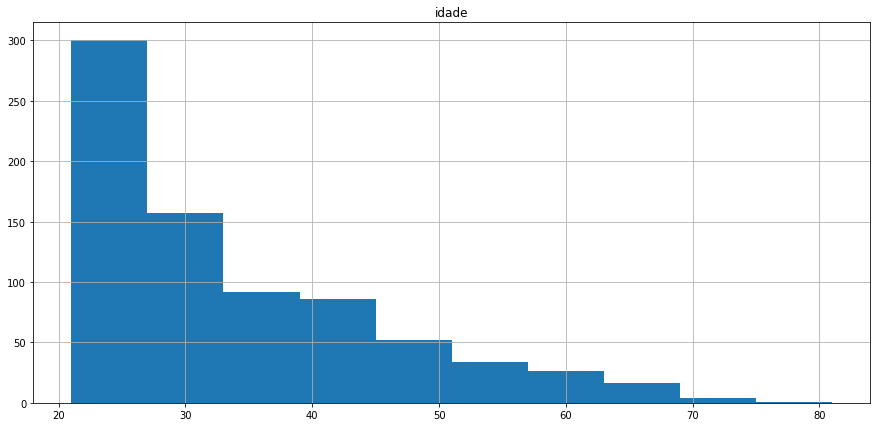

In [ ]:
diabetes_dados.hist(column="idade",figsize=(15,7),bins=10)


In [ ]:
diabetes_dados.rename(columns={"idade":"IDADE"},inplace=True)
diabetes_dados

,IMC,IDADE
0,33.6,50
1,26.6,31
2,23.3,32
3,28.1,21
4,43.1,33
...,...,...
763,32.9,63
764,36.8,27
765,26.2,30
766,30.1,47


# Análise WCSS

In [ ]:
def WCSS_IMC(diabetes_wcss):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X=diabetes_wcss)
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
wcss_analise = WCSS_IMC(diabetes_dados)

for c in range(len(wcss_analise)):
  print(f" para o cluster {c} o valor é de {wcss_analise[c]}")

 para o cluster 0 o valor é de 153755.14389322925
 para o cluster 1 o valor é de 76677.11304060822
 para o cluster 2 o valor é de 56117.87413245288
 para o cluster 3 o valor é de 40128.58712889356
 para o cluster 4 o valor é de 33726.25991454128
 para o cluster 5 o valor é de 28996.810458967833
 para o cluster 6 o valor é de 23893.941966416947
 para o cluster 7 o valor é de 20597.06682527348
 para o cluster 8 o valor é de 18380.32937473458
 para o cluster 9 o valor é de 16830.95479787176


In [ ]:
grafico_wcss = px.line(x=range(1,11),y=wcss_analise)
fig = go.Figure(grafico_wcss)
fig.update_layout(
    title="Calculando o WCSS",
    xaxis_title="Cluster",
    yaxis_title = "Valor do cluster")

fig.show()



# Kmeans

In [ ]:
kmeans_ajustado = KMeans(n_clusters=4,random_state=0)
diabetes_dados["Cluster"] = kmeans_ajustado.fit_predict(diabetes_dados[["IMC","IDADE"]])
diabetes_dados

,IMC,IDADE,Cluster
0,33.6,50,2
1,26.6,31,3
2,23.3,32,3
3,28.1,21,3
4,43.1,33,0
...,...,...,...
763,32.9,63,2
764,36.8,27,0
765,26.2,30,3
766,30.1,47,1


In [ ]:
centroide = kmeans_ajustado.cluster_centers_
centroide

array([[38.45529954, 25.85714286],
       [34.22110553, 40.03015075],
       [30.06494845, 57.02061856],
       [25.48705882, 25.18039216]])

In [ ]:
grafico  = px.scatter(x=diabetes_dados["IMC"],y=diabetes_dados["IDADE"],color=diabetes_dados["Cluster"])
grafico_centroide = px.scatter(x=centroide[:,0],y=centroide[:,1],size=[7,7,7,7])
grafico_final = go.Figure(grafico.data + grafico_centroide.data)
grafico_final.update_layout(title = "Análise dos clusters", xaxis_title = "IMC" , yaxis_title = "IDADE")
grafico_final.show()

In [ ]:
def grafico_plotar(x,y,cor):
  grafico = px.scatter(x=x,y=y,color=cor)
  grafico.show()

In [ ]:
grafico_plotar(x=diabetes_dados["IMC"],y=diabetes_dados["IDADE"],cor=diabetes_dados["Cluster"])

# Segmentando Cliente

In [ ]:
diabetes_dados.loc[diabetes_dados['Cluster'] == 0,"Nome_Cluster"] = "Baixa Idade - Alto IMC"
diabetes_dados.loc[diabetes_dados['Cluster'] == 1,"Nome_Cluster"] = "Média Idade - Alto IMC"
diabetes_dados.loc[diabetes_dados['Cluster']==2,"Nome_Cluster"] = "Alta Idade - Médio IMC"
diabetes_dados.loc[diabetes_dados['Cluster'] ==3,"Nome_Cluster"] = "Baixa Idade - Baixo IMC"

diabetes_dados

,IMC,IDADE,Cluster,Nome_Cluster
0,33.6,50,2,Alta Idade - Médio IMC
1,26.6,31,3,Baixa Idade - Baixo IMC
2,23.3,32,3,Baixa Idade - Baixo IMC
3,28.1,21,3,Baixa Idade - Baixo IMC
4,43.1,33,0,Baixa Idade - Alto IMC
...,...,...,...,...
763,32.9,63,2,Alta Idade - Médio IMC
764,36.8,27,0,Baixa Idade - Alto IMC
765,26.2,30,3,Baixa Idade - Baixo IMC
766,30.1,47,1,Média Idade - Alto IMC


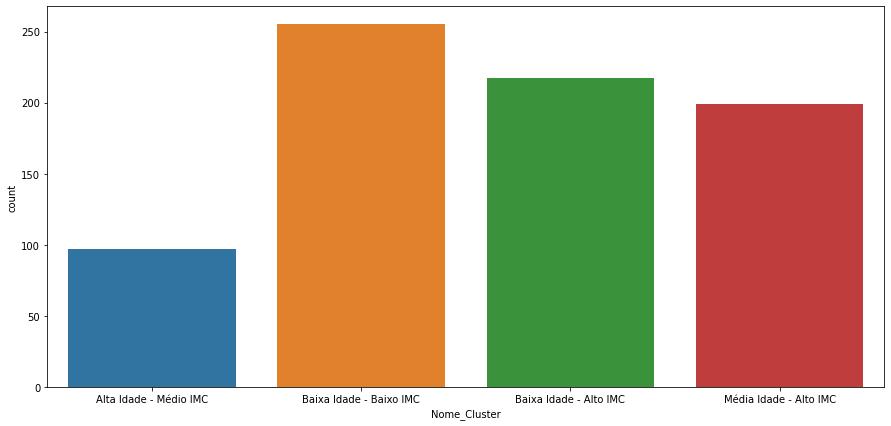

In [ ]:
plt.figure(figsize=(15,7))
grafico_count = sns.countplot(data=diabetes_dados["Cluster"],x=diabetes_dados["Nome_Cluster"])
grafico_count


# Agrupar e entender dados

In [ ]:
diabetes_dados.groupby("Nome_Cluster")["IDADE"].describe()

,count,mean,std,min,25%,50%,75%,max
Nome_Cluster,,,,,,,,
Alta Idade - Médio IMC,97.0,57.020619,6.626933,47.0,52.0,56.0,62.0,81.0
Baixa Idade - Alto IMC,217.0,25.857143,3.308639,21.0,23.0,25.0,28.0,36.0
Baixa Idade - Baixo IMC,255.0,25.180392,3.882984,21.0,22.0,24.0,28.0,37.0
Média Idade - Alto IMC,199.0,40.030151,4.048830,32.0,37.0,40.0,43.0,49.0


In [ ]:
diabetes_dados.groupby(["Nome_Cluster","IDADE"])["IMC"].describe()

count       mean       std   min     25%    50%  \
Nome_Cluster           IDADE                                                    
Alta Idade - Médio IMC 47       1.0  25.500000       NaN  25.5  25.500  25.50   
                       48       3.0  24.100000  4.179713  20.8  21.750  22.70   
                       49       4.0  30.400000  2.465766  27.6  29.400  30.20   
                       50       8.0  31.225000  3.984882  24.3  29.175  31.35   
                       51       8.0  33.975000  5.251054  25.8  31.475  36.25   
...                             ...        ...       ...   ...     ...    ...   
Média Idade - Alto IMC 45      15.0  34.960000  5.246060  27.6  32.550  32.80   
                       46      13.0  34.523077  7.246741  23.1  29.700  32.90   
                       47       5.0  36.380000  6.532764  30.1  30.400  35.50   
                       48       2.0  38.800000  4.949747  35.3  37.050  38.80   
                       49       1.0  38.500000       NaN  38.5  38.500  38.50   

                                75%   max  
Nome_Cluster           IDADE               
Alta Idade - Médio IMC 47     25.50  25.5  
                       48     25.75  28.8  
                       49     31.20  33.6  
                       50     34.05  36.1  
                       51     37.60  39.0  
...                             ...   ...  
Média Idade - Alto IMC 45     36.90  46.8  
                       46     36.60  46.2  
                       47     40.90  45.0  
                       48     40.55  42.3  
                       49     38.50  38.5  

[75 rows x 8 columns]

In [ ]:
#das pessoas que possuem mais de 30 anos, como está o IMC dessa galera
diabetes_dados.query('IDADE >=30').sort_values("IDADE",ascending=True).groupby("Nome_Cluster")["IMC"].describe()

,count,mean,std,min,25%,50%,75%,max
Nome_Cluster,,,,,,,,
Alta Idade - Médio IMC,97.0,30.064948,7.342429,0.0,25.9,30.1,35.20,46.5
Baixa Idade - Alto IMC,33.0,39.360606,5.419637,32.0,34.6,38.1,43.30,50.0
Baixa Idade - Baixo IMC,43.0,25.918605,5.050142,0.0,24.0,26.9,29.25,31.2
Média Idade - Alto IMC,199.0,34.221106,5.417625,23.0,30.5,33.6,37.65,52.3


In [ ]:
#das pessoas que possuem menos ou igual a 25 anos, como está o IMC dessa galera
diabetes_dados.query('Nome_Cluster=="Baixa Idade - Alto IMC" & IDADE<=25').sort_values("IDADE",ascending=True)

,IMC,IDADE,Cluster,Nome_Cluster
738,36.6,21,0,Baixa Idade - Alto IMC
255,33.6,21,0,Baixa Idade - Alto IMC
324,35.7,21,0,Baixa Idade - Alto IMC
354,42.7,21,0,Baixa Idade - Alto IMC
372,35.8,21,0,Baixa Idade - Alto IMC
...,...,...,...,...
467,36.8,25,0,Baixa Idade - Alto IMC
543,39.5,25,0,Baixa Idade - Alto IMC
575,35.5,25,0,Baixa Idade - Alto IMC
411,34.4,25,0,Baixa Idade - Alto IMC


In [ ]:
#das pessoas que possuem mais de 30 anos, como está o IMC dessa galera
diabetes_dados.query('Nome_Cluster=="Baixa Idade - Alto IMC" & IDADE>30').groupby("IDADE")["IMC"].describe()

,count,mean,std,min,25%,50%,75%,max
IDADE,,,,,,,,
21,19.0,37.452632,3.651083,32.4,34.600,36.60,40.650,43.5
22,24.0,37.637500,5.795561,32.2,33.500,35.20,40.375,57.3
23,16.0,38.343750,5.608442,32.8,33.525,37.15,41.325,52.3
24,25.0,37.776000,4.154744,32.1,34.300,37.40,40.500,45.3
25,25.0,37.916000,6.076572,32.7,34.900,36.00,38.700,59.4
